# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.3 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/My Drive/foodhub_order.csv')


In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

### Observations:
The FoodHub dataframe contains 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



#### Observations:

* All 1898 observations are complete, with no missing (non-null) values in any column.
* The data types (float64, object, and int64) are suitable for each respective variable.
* The dataset includes 1 float, 4 integer, and 4 object data types.
* The total memory usage for the dataset is around 133.6 KB.




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* There are no null values in the dataframe, so no data treatment is needed.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


* The Order ID and Customer ID columns serve as unique identifiers for each order.
* Among the 1898 observations, the bottom 25% have a cost of 12.08 or less, a preparation time of 23 minutes or less, and a delivery time of 20 minutes or less.
* For 50% of the observations, the cost is 14.14 or less, with a preparation time of 27 minutes or less and a delivery time of 25 minutes or less.
* In 75% of the observations, the cost is 22.29 or less, the preparation time is 31 minutes or less, and the delivery time is 28 minutes or less.
* Food preparation time ranges from a minimum of 20 minutes to an average of 27.37 minutes, reaching a maximum of 35 minutes once the order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

* Out of the 1898 orders, 736 do not have a rating.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Order ID**


In [ ]:
# Write the code here
# check unique order ID
df['order_id'].nunique()

1898

**Customer ID**


In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

**Restaurant name**


In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

**Cuisine type**


In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

In [ ]:
large_to_small = df.groupby('cuisine_type').size().sort_values().index[::-1]


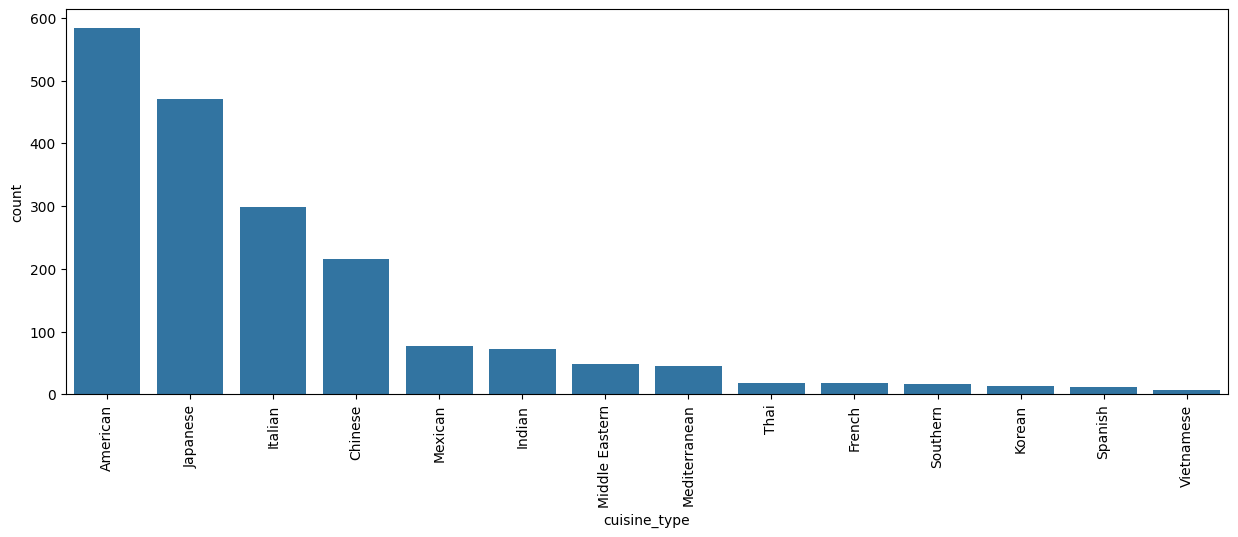

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type', order=large_to_small); ## Create a countplot for cuisine type.
plt.xticks(rotation=90);

**Cost of the order**


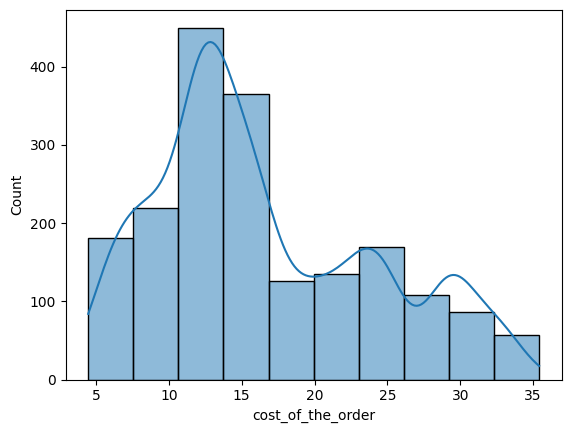

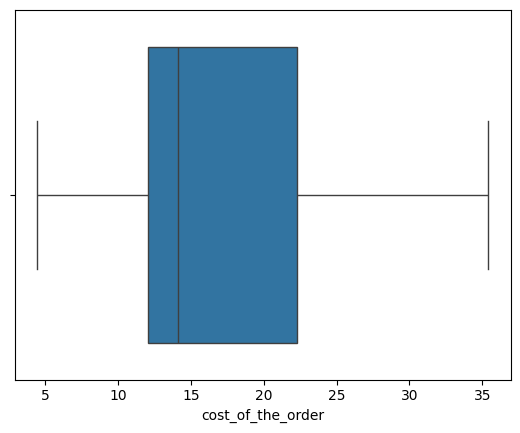

In [ ]:
sns.histplot(data=df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df, x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Observations:

*   The distribution shows a slight left skew, indicating a tendency toward lower costs.
*   There is a small peak around the 25 dollars mark.
*   The boxplot reveals a median cost of approximately 14 dollars, with the orders showing a right skew.
*   The least expensive order costs 5 dollars, while the most expensive reaches 35 dollars.

**Day of the week**


In [ ]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

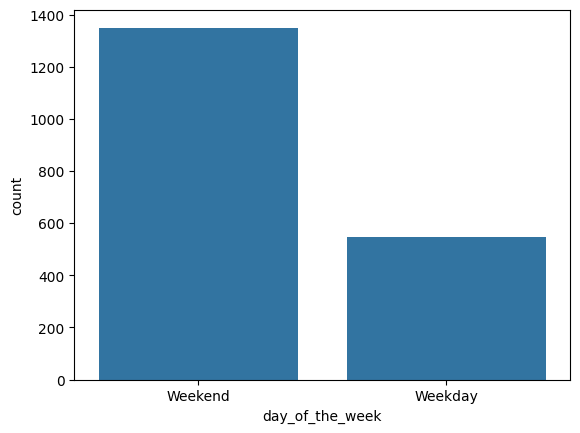

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week');

**Rating**


In [ ]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

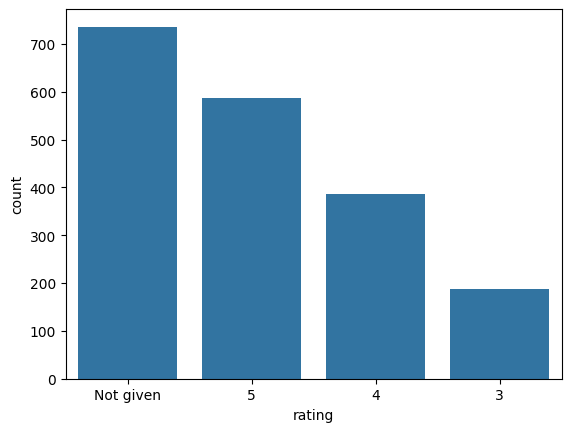

In [ ]:
sns.countplot(data = df, x = 'rating',
              order=['Not given', '5', '4', '3']);

#### Observations:

*   The above indicates that over 700 customers did not provide a rating for their experience.
*   Among the customers who did rate, the majority gave a 5-star rating for their experience.

**Food Preparation time**


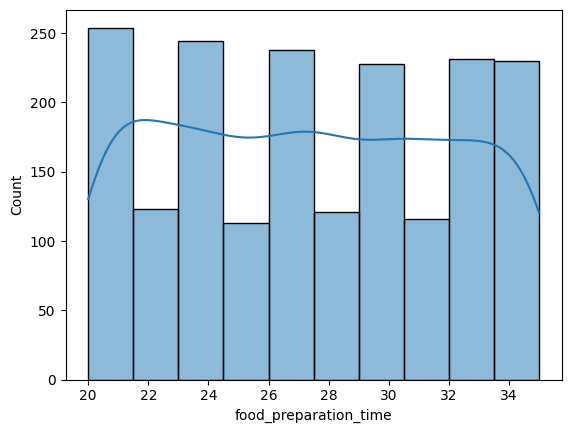

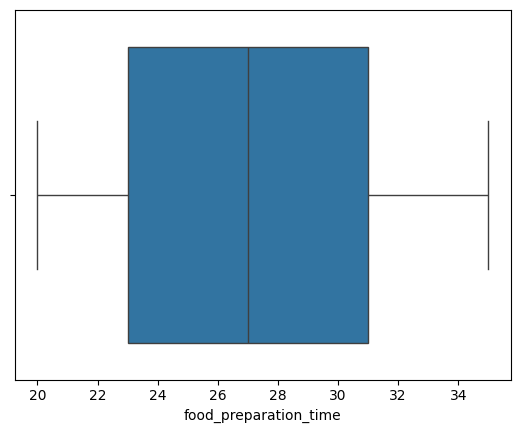

In [ ]:
sns.histplot(data=df,x='food_preparation_time', bins = 10,stat = 'count',kde = True) ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Observations:

*   Preparing the dish takes between 20 and 36 minutes, with a median time of approximately 27 minutes.

**Delivery time**


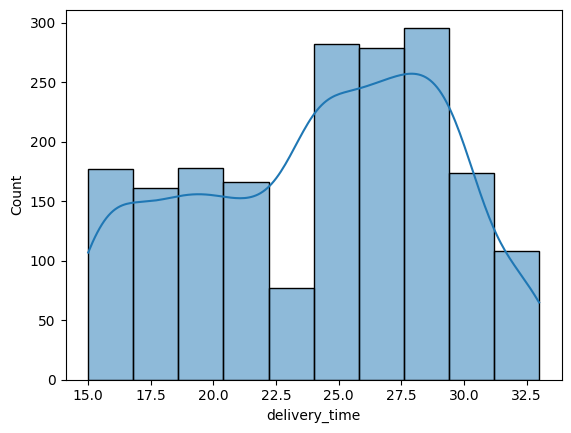

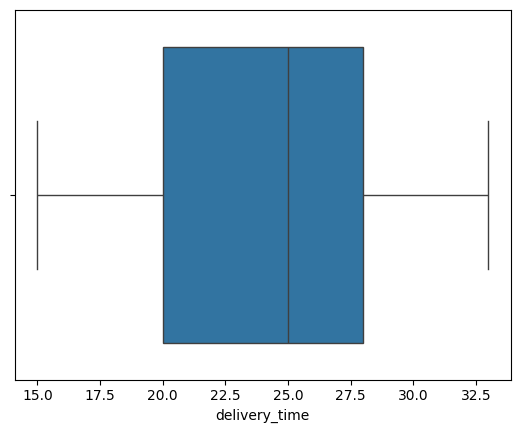

In [7]:
sns.histplot(data=df,x='delivery_time', bins = 10,stat = 'count',kde = True) ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

#### Observations:

*   The median delivery time is around 25 minutes, with the data showing a left skew.
*   The histogram indicates that most orders are delivered within 25 to 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observation:


* The five restaurants with the highest number of orders are Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders, and Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].mode()

,cuisine_type
0,American


In [ ]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:

*  American cuisine is the most popular on weekends, with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

*  The total number of orders costing more than 20 dollars is 555.
*  The percentage of orders over 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
round(df.delivery_time.mean(),2)

24.16

#### Observations:

*   The mean delivery time for this dataset is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(5)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:

*   Customer with ID 52832 placed 13 orders.
*   Customer with ID 47440 placed 10 orders.
*   Customer with ID 83287 placed 9 orders.
*   Customer with ID 250494 placed 8 orders.
*   Customer with ID 259341 placed 7 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Cuisine vs Cost of the order**


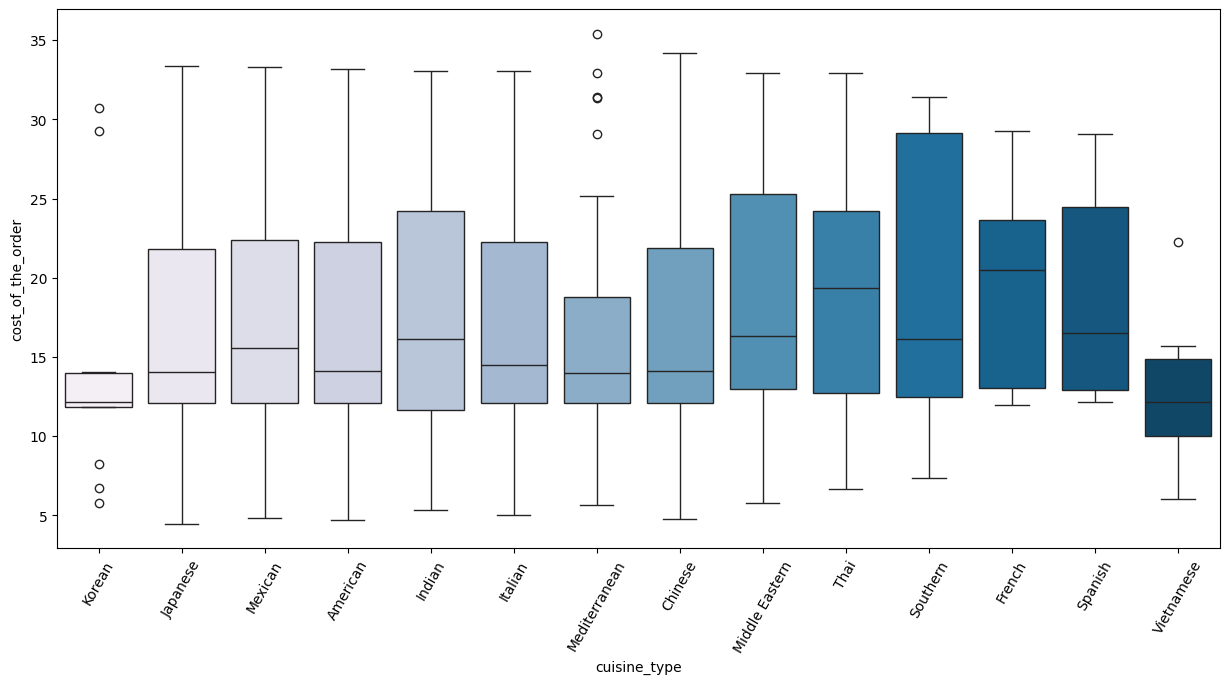

In [ ]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df, hue="cuisine_type", palette="PuBu", legend=False)
plt.xticks(rotation = 60)
plt.show()

**Cuisine vs Food Preparation time**


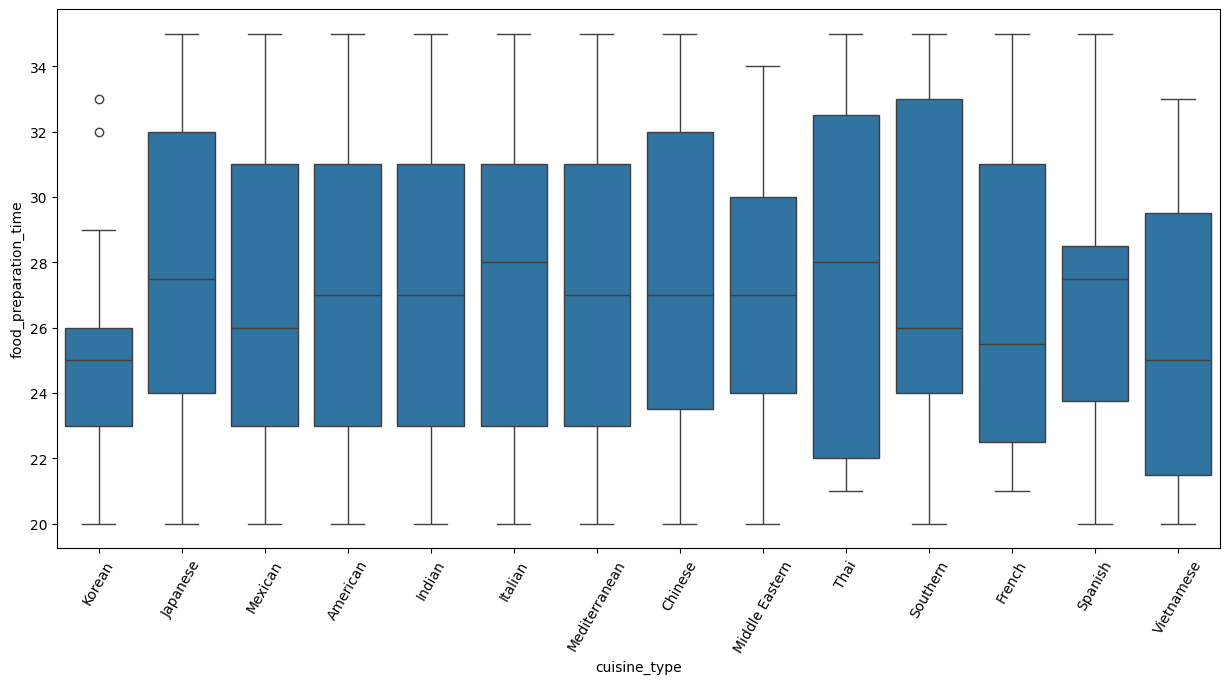

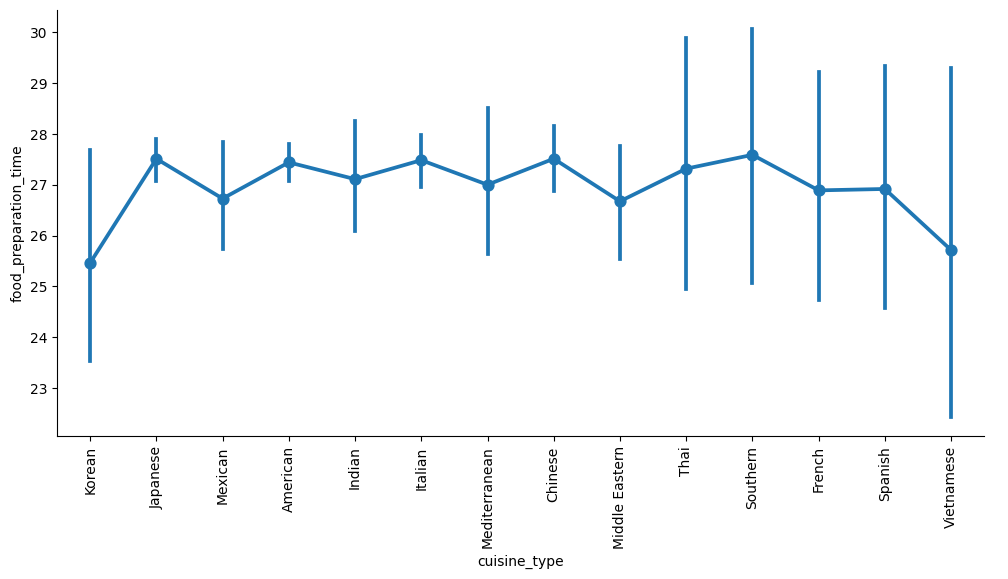

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=60)
plt.show()

# Point plot for food preparation time by cuisine type
sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', kind='point', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

#### Observations:

*   Most cuisine types have a similar average preparation time, though some display a wider spread within the 95% confidence interval.

*   Observations on Order Cost Spread: Most cuisines exhibit varying levels of skewed costs, with a few, such as Korean, Mediterranean, and Vietnamese, having notable outliers.

**Day of the Week vs Delivery time**


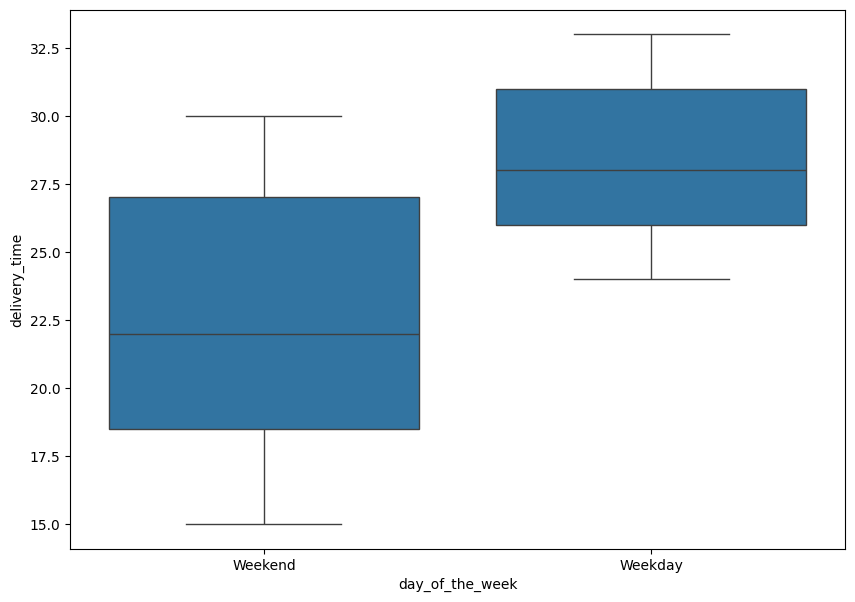

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(10,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Observations:

*  Analysis of day of the week against other variables shows a consistent spread of observations regardless of the day, except for delivery time, which tends to be longer on weekdays than on weekends.
*   The median delivery time on weekends is approximately 22.5 minutes, compared to about 28.5 minutes on weekdays.

**Rating vs Delivery time**


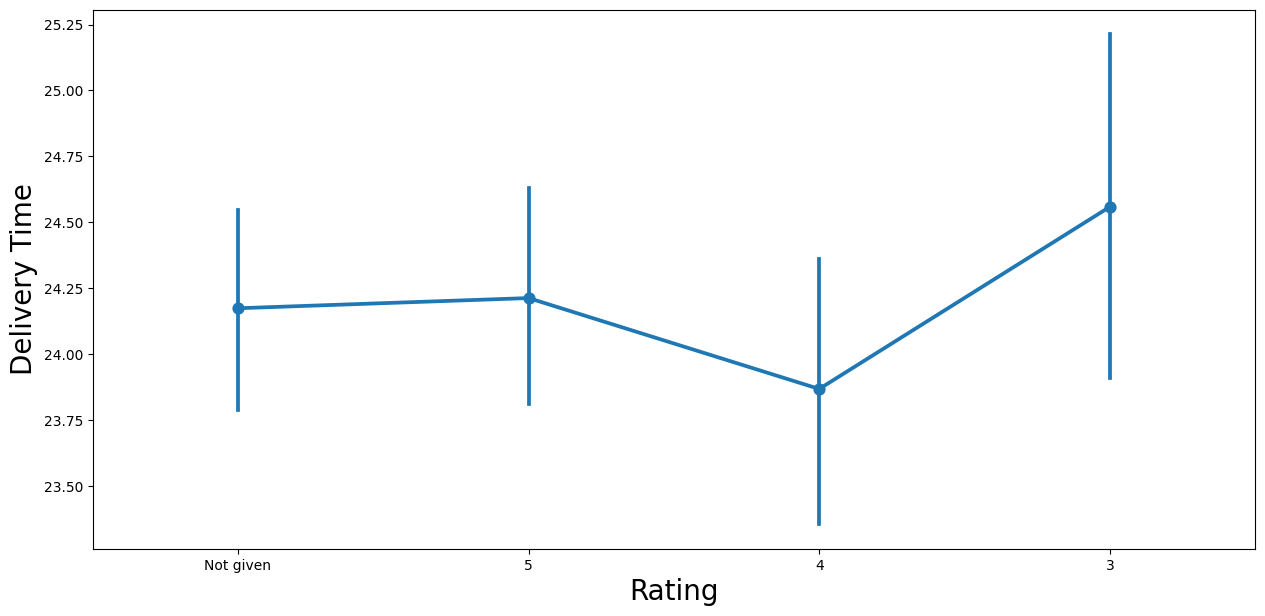

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time',
              order=['Not given', '5', '4', '3'], data = df)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Delivery Time', fontsize = 20)
plt.show()


#### Observations:

*   Restaurants with a 3-star rating have the longest delivery times.
*   5-star restaurants are also the most costly.

**Rating vs Food preparation time**


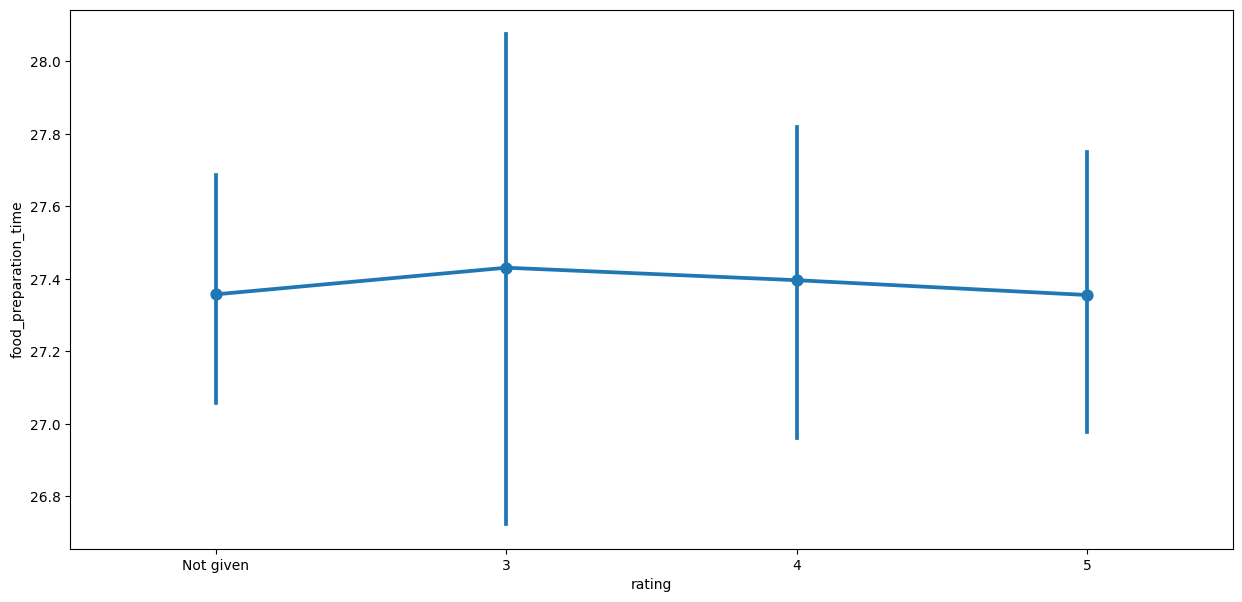

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time',
              order=['Not given', '3', '4', '5'], data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Observations:

*  The time taken to prepare food does not affect the rating.

**Rating vs Cost of the order**


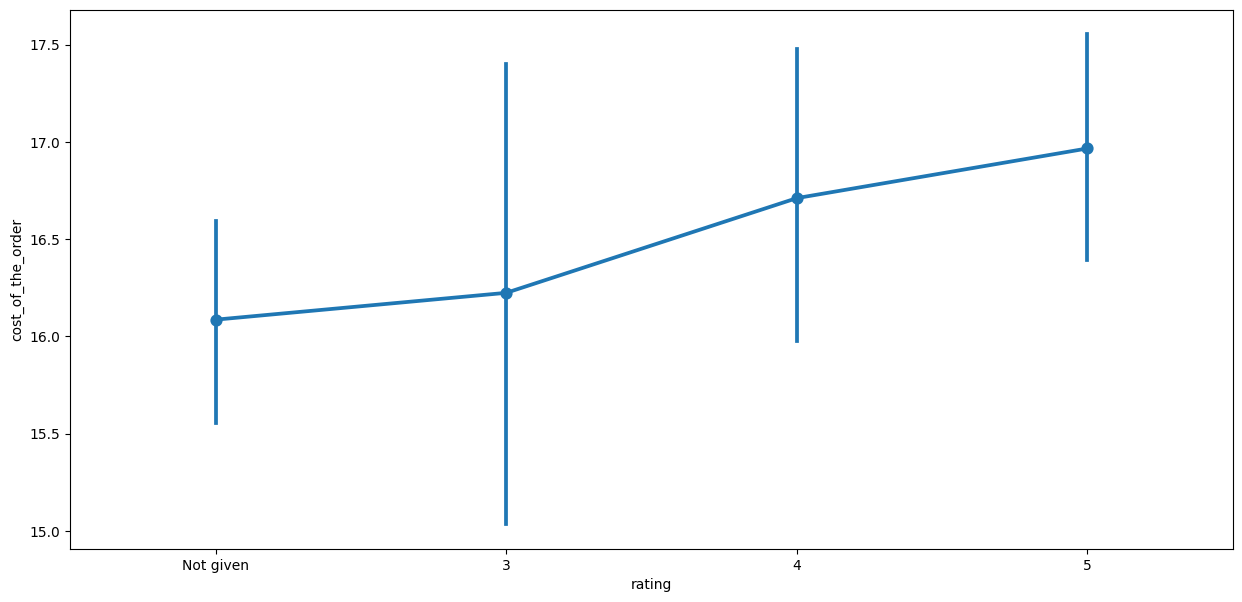

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order',
              order=['Not given', '3', '4', '5'], data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Observation:

*   The above figures indicate that delivery times are longer for 3-star rated orders, which also tend to have a lower cost. Reducing the delivery time for these orders could help boost demand, as the pricing is already relatively low.

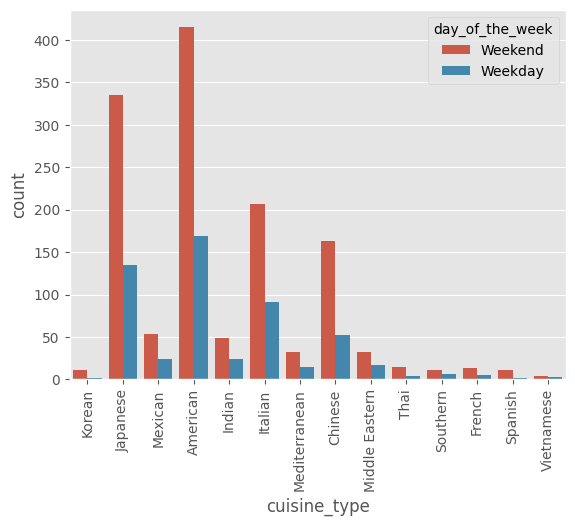

In [ ]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax=sns.countplot(data=df,x='cuisine_type', hue= 'day_of_the_week')
    plt.xticks(rotation=90)
    plt.savefig('cuisine_type_vs_day_of_the_week.png', dpi=300, bbox_inches='tight')

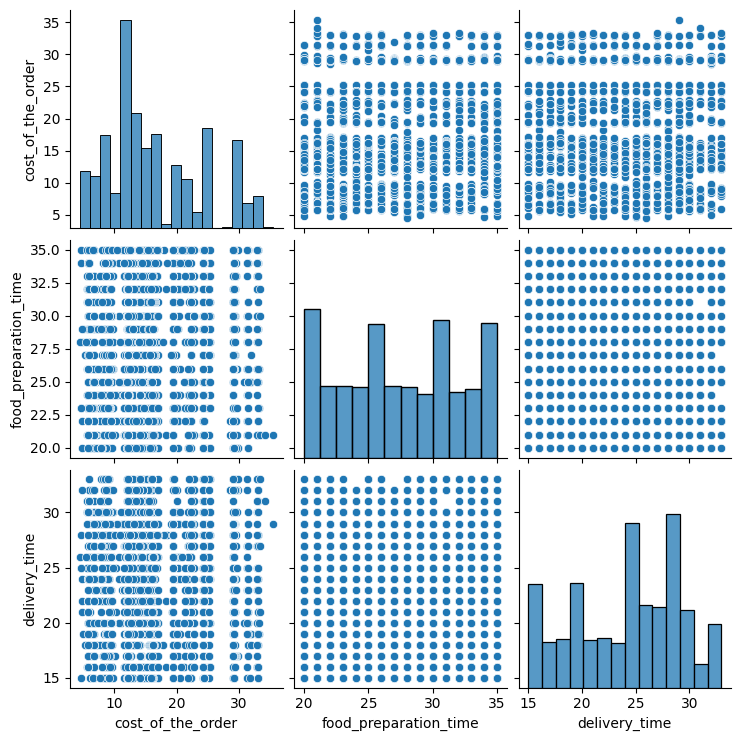

In [ ]:
sns.pairplot(data = df.loc[:, ('cost_of_the_order', 'food_preparation_time', 'delivery_time')])
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

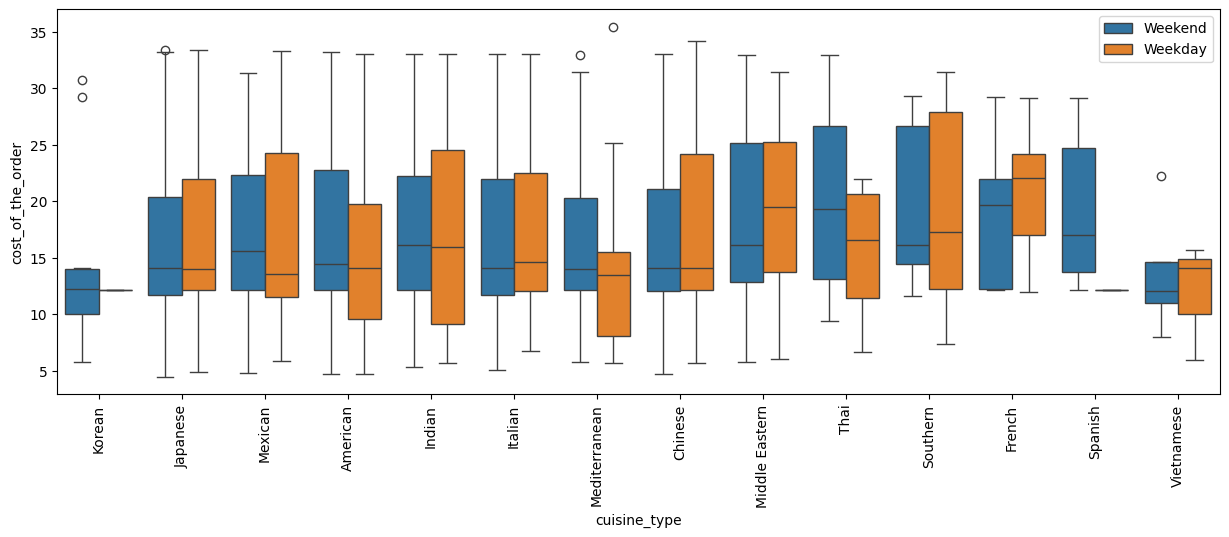

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order' , hue='day_of_the_week', data=df, ax=ax)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.savefig('multivariateplot.png', dpi=300, bbox_inches='tight')

#### Observation:

*  Spanish cuisine tends to be more expensive on weekends.

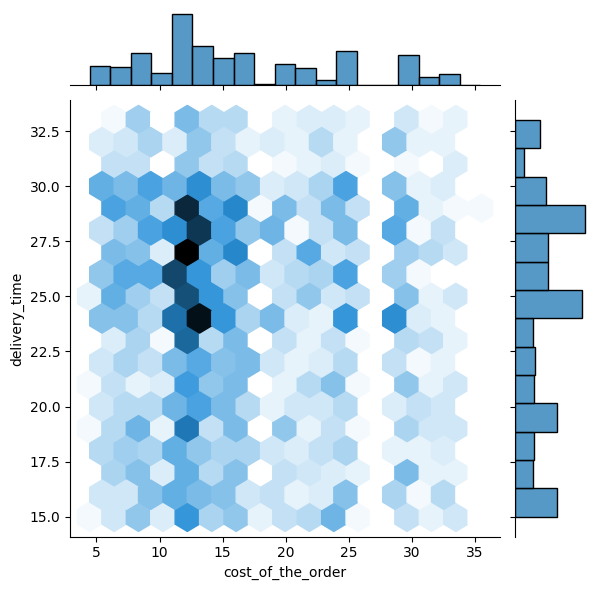

In [ ]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time', kind = 'hex')
plt.savefig('jointplot_dt_coto.png', dpi=300, bbox_inches='tight')

**Observation**

* Order costs are heavily concentrated around $11, with delivery times typically ranging between 24 and 30 minutes.


**Correlation among variables**


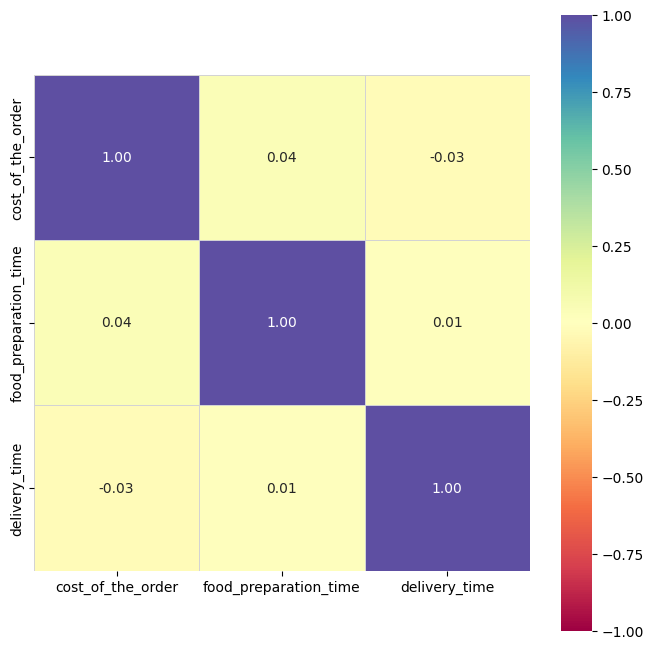

In [ ]:
# Plot the heatmap

#corr = df[col_list].corr()

#mask = np.triu(np.ones_like(corr, dtype=bool))

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 8))
sns.heatmap(df[col_list].corr(), square=True, annot=True, vmin=-1, vmax=1, fmt=".2f", linewidth=0.5, linecolor='lightgray', cmap="Spectral")
plt.show()

#### Observation:

*   The heatmap indicates a very weak correlation among the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations:

*   Four restaurants—Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop—are eligible for the promotional offer.

In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


*  The revenue generated by each restaurant aligns with the order of restaurants receiving the highest number of orders. The company charges a 25% fee on orders over 20 dollars and a 15% fee on orders over 5 dollars, resulting in a total net revenue of approximately $6,166.30 across all orders.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

*   As a result of market price differentiation, FoodHub gathered a total of $6,163.39 from the orders placed.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_over_60 = round(len(df[df['total_time'] > 60]) / len(df) * 100, 1)
print("Percentage of orders that have more than 60 minutes of total delivery time:", percentage_over_60)


Percentage of orders that have more than 60 minutes of total delivery time: 10.5


#### Observations:


*  The percentage of orders with a total delivery time exceeding 60 minutes is 10.5%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

*   The average delivery time on weekends is 22.47 minutes, compared to 28.34 minutes on weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  With ratings predominantly at the high score of 5, it seems that only highly satisfied customers tend to rate the service. However, a substantial portion of data (about 38%) is missing due to unrated orders. This raises an interesting question: could the inclusion of unrated orders shift the overall rating in a different direction?
*   Although order costs peak around 13 dollars, there is a secondary peak near 25 dollars, creating a bimodal distribution.
*   Spanish cuisine tends to be more expensive on weekends.
*   Preparation time remains relatively stable compared to delivery time, indicating that delivery time is the major factor influencing the total time from order placement to customer delivery.
*   Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Chicke,Parm are the top 5 restaurants in terms of received orders
*   Cuisine popularity remains consistent throughout the week, though demand is noticeably higher on weekends.
*   Four customers are tied for the 5th position under the proposed reward criteria, necessitating further analysis or a decision on how to resolve this tie.

### Recommendations:

*   FoodHub could consider increasing the number of highly-rated restaurants offering popular cuisine types—such as American, Japanese, Italian, Chinese, and Indian—to boost the number of orders on the platform.
*   Considering the steady popularity of these cuisines throughout the week, targeted marketing during weekdays could help boost sales.
*   Encourage more customers to rate their orders, aiming to reduce the number of 'Not given' ratings.
*   We observed that most orders fall within the 10 to 20 dollars range, so including more restaurants with average prices in this range could help boost order volume.
*   FoodHub should look for ways to shorten delivery times on weekdays.
*   Adding more employees on weekends could be an effective strategy for cost-efficient operations.

---